## Линейная регрессия

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


### Модель и допущения

Регрессия используется, когда эндогенная переменная является непрерывной и у нас есть набор пар $x_i, y_i$ - то есть происходит обучение "с учителем".

Как мы узнали с вами ранее, в случае МНК следующие подходы эквивалентны:
- геометрический;
- минимизация квадрата ошибки;
- статистический.

Напомню, что мы решаем задачу минимизации суммы квадратов ошибок:

$$ RSS(\beta) = (Y-X\beta)^T(Y-X\beta).$$

И оценки коэффициентов в данном случае:

$$ \hat{\beta} = \left(X^TX\right)^{-1}X^Ty.$$

Ошибкой в данному случае будет являться разница между предсказанным и верным значением:

$$ e_i = y_i - \hat{y}_i = y_i - x_i\beta.$$

Для того, чтобы мы могли найти оценки - $X$ должна быть полного ранга, то есть переменные не должны коррелировать между собой.

**Условия Гаусса-Маркова**:

- детерминированность $X$;
- $E(e_i) = 0;$
- $V(e_i) = \sigma^2;$
- $cov(e_i, e_j) = 0 \,\, \forall i \neq j.$

При соблюдении условий Гаусса-Маркова регрессия будет являться наилучшей несмещенной оценкой линейной взаимосвязи (BLUE) между переменными.

$$ E[Y|X] = X\hat{\beta}.$$

Нарушения допущений:
- мультиколлинеарность - наличие существенной корреляции между независимыми переменными;
- гетероскедастичность - зависимость дисперсии от значений независимых переменных;
- автокорреляция ошибок - нарушение условия $cov(e_i, e_j) = 0.$

### Регрессия в statsmodels

In [6]:
data = pd.read_csv('data/Advertising.csv', index_col=0)

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Целевая переменная - sales, экзогенные - затраты на рекламу по направлениям.

In [8]:
data.shape

(200, 4)

(0, 120)

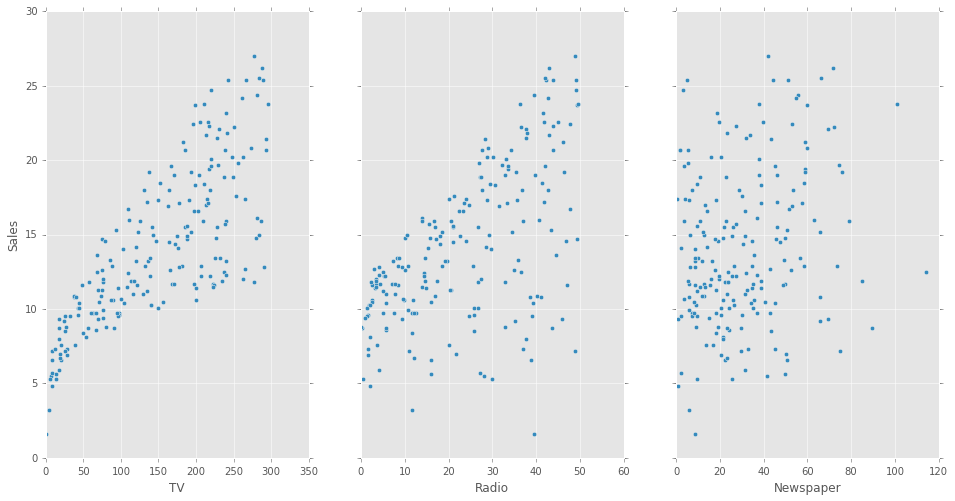

In [9]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
axs[0].set_xlim(0, 350)
axs[1].set_xlim(0, 60)
axs[2].set_xlim(0, 120)

Если бы мы хотели оценить влияние только лишь одной переменной, то все было бы достаточно просто (источник - https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb):

<img src="08_estimating_coefficients.png">

Что будет представлять из себя оценка МНК (https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)?

<img src="08_slope_intercept.png">

In [10]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Делать "предсказания" тоже достаточно просто:

In [11]:
X_new = pd.DataFrame({'TV': [50, 40, 60, 65]})
X_new.head()

,TV
0,50
1,40
2,60
3,65


In [12]:
lm.predict(X_new)

array([  9.40942557,   8.93405917,   9.88479198,  10.12247518])

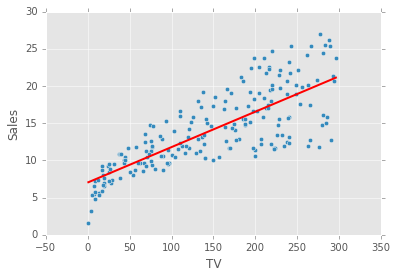

In [13]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
preds = lm.predict(X_new)
data.plot(kind='scatter', x='TV', y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)

Но это было в некторой степени искусственное ограничение - вместо использования одной переменной нам следовало включить всю доступную информацию.

In [14]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

Как нам понять качество модели?

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 May 2016   Prob (F-statistic):           1.58e-96
Time:                        18:06:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ TSS = \sum_{i} (y_i-\bar{y})^2,$$
$$ ESS = \sum_{i} (\hat{y}_i-\bar{y})^2,$$
$$ RSS = \sum_{i} (\hat{y}_i-y_i)^2.$$

Разберем по порядку:
- **$R^2$: дисперсия, объясненная моделью $ESS/TSS$;**

Для регрессии с одной переменной, коэффициент детерминации равен квадрату коэффициенту корреляции между зависимой и объясняющей переменной.

Для множественной регресии применяется поправка:

$$ R^2_{adj} = R^2 - (1-R^2) \frac{p-1}{n-p}.$$

- **$t-test$: тест на значимость (отличие от нуля) коэффициента при переменной;**

Вспомним, что дисперсия оценок коэффициентов задавалась нами как:

$$ V(\hat{\beta}) = (X^TX)^{-1}\hat{\sigma}^2.$$
$$ \hat{\sigma}^2 = \frac{1}{n-p-1} \sum_{i=1}^{n} (y_i-\hat{y}_i)^2.$$

Тогда, t-статистика для оценки коэффициента при переменной $i$ задается как:
$$ t_i = \frac{\hat{\beta}_i}{\hat{\sigma}\sqrt{\nu_i}}.$$

Статистика имеет t-распределение Стьюдента с $n-p-1$ степенями свободы. 

- **доверительный интервал для коэффициентов;**

Аналогично, с использованием стандартных ошибок коэффициентов имеем:

$$ CI(\hat{\beta}_i) = [\hat{\beta}_i - zSE_i, \hat{\beta}_i + zSE_i].$$

- **F-критерий : все коэффициенты одновременно равны нулю;**

Статистический тест на одновременное равенство всех коэффициентов нулю. Альтернативная гипотеза - хотя бы один из коэффициентов отличен от нуля.

$$ F = \frac{(RSS_0-RSS_1)/(p_1-p_0)}{RSS_1/(n-p_1-1)}.$$

Число степеней свободы $\left( (p_1 - p_0), (n-p_1-1) \right).$

- **Log-likelihood;**

Одним из предположений модели было нормальное распределение ошибок. Если это предположение принять, то можем записать логарифм функции правдоподобия как:

$$ ln(\mathbf{L}) = \sum_{i=1}^{n} \ln {\frac{1}{\sqrt{2\pi\hat{\sigma}^2}}} - \frac{1}{2\hat{\sigma}^2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$

- **AIC;**

Информационный критерий Акайке:
$$ AIC = 2p - 2 ln(\mathbf{L}).$$

Используется для выбора между моделями.

- **BIC;**

Информационный критерий Шварца:
$$ BIC = p\ln n - 2 ln(\mathbf{L}).$$

Используется для выбора между моделями.

- **Omnibus test;**

Это уже известный нам тест Д'Агостино. Используется для проверки ошибок на нормальность распределения, а именно соответствие выборочных коэффициентов асимметрии и эксцесса своим теоретическим значениям.

- **Jarque-berra test;**

Известный нам тест на нормальность. Используется для проверки гипотезы о нормальном распределении ошибок.

- **Durbin-Watson;**

Тест на автокорелляцию остатков. Рассчитывается как:

$$DW = \frac{\sum_{i=2}^{n} \left( (y_i - \hat{y}_i) - (y_{i-1} - \hat{y}_{i-1}) \right)^2}{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2} .$$

Значение статистики ограничено [0, 4]. Значения от 0 до 1 говорят о положительной автокорелляции, значения близкие к 2 - об ее отсутствии, близкие к 4 - об отрицательной автокорреляции.

- **Condition number;**

Мера численной стабильности исходной матрицы - для матриц, близких к вырожденным будет высоким. Вычисляется как:

$$ k(X) = \frac{\sigma_{max}(X)}{\sigma_{min}(X)}.$$

Простая эвристика - желательно, чтобы было менее 30.

И, как всегда, "рабочая лошадка" для быстрого визуального анализа - QQ график.

In [16]:
mod_fit = sm.OLS(data['Sales'], data[['TV','Radio','Newspaper']]).fit()
res = mod_fit.resid
fig = sm.qqplot(res, stats.norm, fit=True, line='45')
plt.show()

NameError: name 'sm' is not defined

In [19]:
data[['TV','Radio','Newspaper']].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


**Тесты на гетероскедастичность**

In [76]:
from statsmodels.stats import diagnostic as ols_d

In [20]:
exog = data[['TV','Radio','Newspaper']]
exog['cons'] = 1

**Тест Бреуша-Пагана**

Нулевая гипотеза - остатки гомоскедастичны.

In [84]:
ols_d.het_breushpagan(res, exog)

(50.422859287570418,
 6.4929094117365151e-11,
 22.02404363236268,
 2.4702614583602155e-12)

**Тест Уайта**

In [85]:
ols_d.het_white(res, exog)

(90.013006215635286,
 1.618316822121855e-15,
 17.277266250125898,
 1.0652631334193858e-20)

### Регрессия в sklearn

In [36]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
print lm.intercept_
print lm.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [39]:
lm.score(X, y)

0.89721063817895208

In [50]:
errs = y - lm.predict(X)

In [59]:
import seaborn as sns
sns.set(color_codes=True)

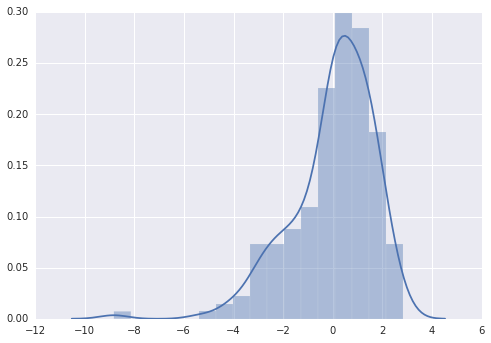

In [61]:
sns.distplot(errs)

## Выбор модели

Вообще говоря, методы можно разделить на "статистические" (которые используют статистические критерии и "ручной" разбор модели) и методы машинного обучения, которые построены таким образом, чтобы автоматически "выделять" наиболее важные переменные и решать потенциальные проблемы в ходе решения задачи обучения.

"Статистические" методы:

- проверка гипотез о равенстве коэффициентов нулю;
- F-test о равенстве нулю коэффициентов и для выбора между моделями;
- тест на автокорреляцию остатков;
- проверка корреляции между переменными;
- тестирование модели на гетероскедастичность;
- сравнение моделей между собой с помощью AIC и BIC.

## Робастная регрессия

Под данными моделями подразмевают класс моделей, устойчивых к выбросам. Наиболее известная - RANSAC.

Алгоритм итеративный, неформально его можно описать следующим образом:

1. Выбрать случайные k точек. Назвать их потенциальными "допустимыми".
2. Построить на них модель OLS.
3. Протестировать не вошедшие точки против полученной модели. Те, которые были предсказаны хорошо, включить в т.н. "множество согласия".
4. Если достигнуто заранее установленное число допустимых точек, то модель считается допустимой и запоминается.
5. После того как было достигнуто заранее определенное число итераций, выбирается наилучшая из запомненных моделей.

Пример из sklearn (http://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html):

Estimated coefficients (true, normal, RANSAC):
(array(82.1903908407869), array([ 54.17236387]), array([ 82.08533159]))


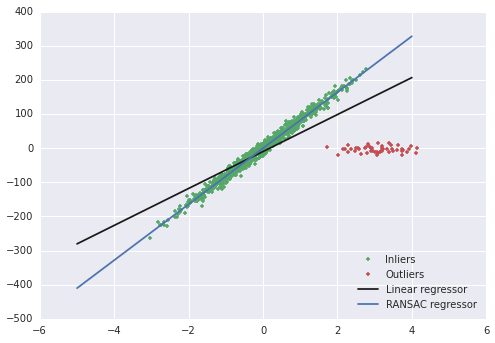

In [87]:
from sklearn import linear_model, datasets
import numpy as np

n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print(coef, model.coef_, model_ransac.estimator_.coef_)

plt.plot(X[inlier_mask], y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear regressor')
plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
plt.legend(loc='lower right')
plt.show()

### Квантильная регрессия

Метод используется, если нас интересует оценка не условного среднего при данных ковариатах, а оценка квантиля распределения эндогенной переменной при данных ковариатах.

In [89]:
from __future__ import print_function
import patsy

import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


Этот же набор данных использовался в оригинальной статье - http://www.econ.uiuc.edu/~roger/research/rq/QRJEP.pdf

Авторы приводят слудующую мотивацию:
- траты на еду увеличиваются с увеличением дохода;
- дисперсия трат увеличивается с увеличением дохода;
- для наиболее бедных домохозяйств предсказания OLS не пременимы.

LAD (least absoulte deviation) - модель оценки условной медианы при данных ковариатах.

In [90]:
mod = smf.quantreg('foodexp ~ income', data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Fri, 06 May 2016   No. Observations:                  235
Time:                        10:25:44   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000        52.649   110.315
income         0.5602      0.013     42.516      0.000         0.534     0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


Построим оценки для квантилей в диапазоне [0.05, 0.95].

In [92]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + \
            res.conf_int().ix['income'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('foodexp ~ income', data).fit()
ols_ci = ols.conf_int().ix['income'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['income'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q           a         b        lb        ub
0  0.05  124.880099  0.343361  0.268632  0.418090
1  0.15  111.693660  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033435  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'a': 147.47538852370576, 'b': 0.4851784236769236, 'lb': 0.45687381301842334, 'ub': 0.51348303433542386}


/usr/local/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)


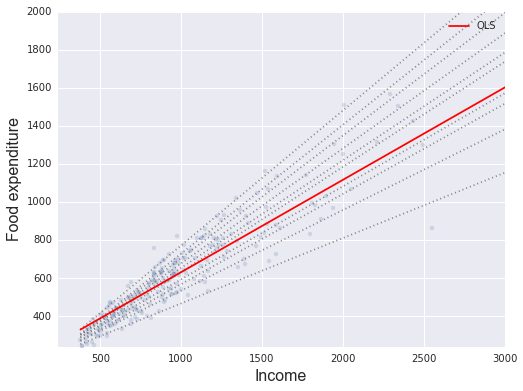

In [93]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.income, data.foodexp, alpha=.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=16)
ax.set_ylabel('Food expenditure', fontsize=16);

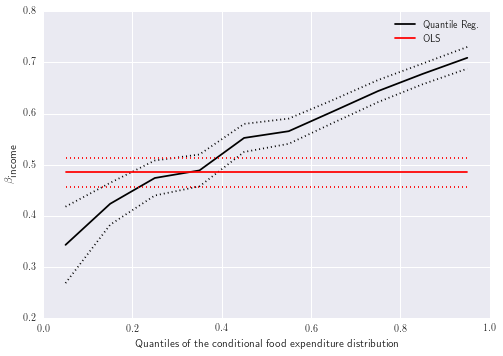

In [95]:
from matplotlib import rc
rc('text', usetex=True)
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'\beta_\mbox{income}')
plt.xlabel('Quantiles of the conditional food expenditure distribution')
plt.legend()
plt.show()